In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from MdpSolverLibs import *
from EnvLibs import TrafficGenerator

In [2]:
params = {
    'N_user': 4,
    'LEN_window': 10,
    'r_bar': 4,
    'B': 40,
    'M_list': [2,3],
    'randomSeed': 999,
    'alphaList': np.linspace(0, 1.0, 10),
    'N_aggregation': 4
}

with open('Results/TrafficData/trafficData.pkl', 'rb') as f:
    trafficData = pickle.load(f)

trafficGenerator = TrafficGenerator(params)
trafficGenerator.registerDataset(trafficData['traffic'])
mdpFormulator = MdpFormulator(params, trafficGenerator.M_user)
print(np.sum(trafficGenerator.M_user, axis=1))
print(mdpFormulator.N_states)
print(mdpFormulator.N_actions)
print(mdpFormulator.N_states_original**mdpFormulator.N_user)
print(mdpFormulator.N_states_original**mdpFormulator.N_user*mdpFormulator.N_actions)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
256
320
14641
4685120


In [3]:
mdpFormulator.aggregateModel(approximate=True)
print(mdpFormulator.aggregationMap)

[0 0 0 1 2 2 3 3 3 3 3]


In [4]:
import pickle

mdpKernel = mdpFormulator.getMdpKernel()
print(mdpKernel.rewardTable.shape)
print(mdpKernel.transitionTable.shape)
mdpKernel.minimize_policy()
with open('results/mdpKernel.pkl', 'wb') as f:
    pickle.dump(mdpKernel, f)   
with open('results/params.pkl', 'wb') as f:
    pickle.dump(mdpFormulator.params, f)
#print(mdpKernel.V)

(256, 320)
(256, 256, 320)


u:[0, 0, 0, 0], action:([0, 1, 1, 1], array([ 0.        , 10.33333333, 10.33333333, 10.33333333]), 3, 0.7777777777777777)
u:[0, 0, 0, 1], action:([0, 1, 1, 1], array([ 0.        , 10.33333333, 10.33333333, 10.33333333]), 3, 0.7777777777777777)
u:[0, 0, 0, 2], action:([0, 1, 1, 1], array([ 0.        , 10.33333333, 10.33333333, 10.33333333]), 3, 0.7777777777777777)
u:[0, 0, 0, 3], action:([0, 1, 1, 1], array([ 0.        , 10.33333333, 10.33333333, 10.33333333]), 3, 0.7777777777777777)
u:[0, 0, 0, 4], action:([0, 1, 1, 1], array([ 0.        , 10.33333333, 10.33333333, 10.33333333]), 3, 0.7777777777777777)
u:[0, 0, 0, 5], action:([0, 1, 1, 1], array([ 0.        , 10.33333333, 10.33333333, 10.33333333]), 3, 0.7777777777777777)
u:[0, 0, 0, 6], action:([0, 1, 1, 1], array([ 0.        , 10.33333333, 10.33333333, 10.33333333]), 3, 0.7777777777777777)
u:[0, 0, 0, 7], action:([0, 1, 1, 1], array([ 0.        , 10.33333333, 10.33333333, 10.33333333]), 3, 0.7777777777777777)
u:[0, 0, 0, 8], action:(

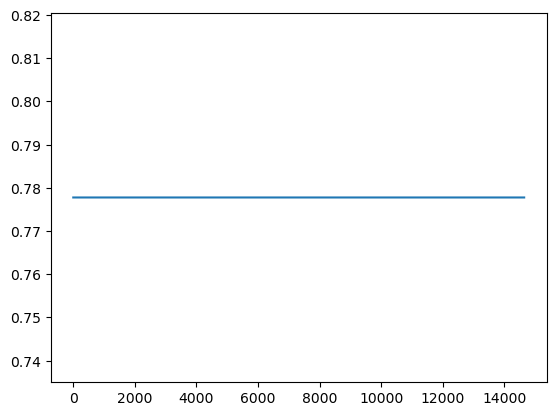

In [5]:
alphaList = []
for trafficIdx in range((params['LEN_window']+1)**params['N_user']):
    u = index_to_tuple(trafficIdx, params['LEN_window']+1, params['N_user'])
    print(f"u:{u}, action:{mdpKernel.getActionFromObervation(u)}")
    alphaList.append(mdpKernel.getActionFromObervation(u)[-1])
plt.plot(alphaList)